# Load Dataset!

In [1]:
#Import library yang diperlukan untuk load data
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Load data latih (training data)!
df_train = pd.read_pickle('/content/gdrive/My Drive/Dataset for Data Science Project/Joints 2021/train.pkl')

#Lihat sekilas data latih nya!
df_train.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender,Target
0,J005766927,55.06,C,NaN,NaN,A,NaN,0,35.0,49.0,NaN,Pria,2
1,J005904963,61.82,C,NaN,2.77769,NaN,2.20250,1,NaN,53.0,75.0,Pria,2
2,J005890232,58.24,B,10.0,3.17744,E,4.06625,NaN,95.0,NaN,62.0,Pria,2
3,J005727215,32.26,A,4.0,2.69283,A,4.06625,0,44.0,53.0,74.0,NaN,2
4,J005802876,27.46,C,0.0,NaN,H,1.35000,1,91.0,52.0,76.0,Wanita,3


In [4]:
#Cek struktur bentuk data latih!
df_train.shape

(98749, 13)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98749 entries, 0 to 98748
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           98749 non-null  object 
 1   Jarak_Perjalanan             76838 non-null  float64
 2   Tipe_Kendaraan               76956 non-null  object 
 3   Pelanggan_Sejak_Bulan        79230 non-null  float64
 4   Indeks_Gaya_Hidup            71491 non-null  float64
 5   Tipe_Tujuan                  77057 non-null  object 
 6   Rating_Pelanggan             77330 non-null  float64
 7   Pembatalan_Sebulan_Terakhir  80477 non-null  object 
 8   Encode_1                     45373 non-null  float64
 9   Encode_2                     81279 non-null  float64
 10  Encode_3                     77632 non-null  float64
 11  Gender                       84921 non-null  object 
 12  Target                       98749 non-null  int64  
dtypes: float64(7), i

In [6]:
#Load data uji (testing data)!
df_test = pd.read_pickle('/content/gdrive/My Drive/Dataset for Data Science Project/Joints 2021/test.pkl')

#Lihat sekilas data uji nya!
df_test.head()

,ID,Jarak_Perjalanan,Tipe_Kendaraan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Tipe_Tujuan,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Gender
0,J005691205,20.58,B,1.0,2.66087,A,4.17500,NaN,NaN,48.0,63.0,Wanita
1,J005904963,61.82,C,1.0,2.77769,A,NaN,1,NaN,53.0,75.0,Pria
2,J005890232,58.24,B,10.0,NaN,E,4.06625,NaN,95.0,NaN,62.0,Pria
3,J005727215,32.26,NaN,4.0,2.69283,A,4.06625,NaN,44.0,53.0,74.0,Pria
4,J005787309,NaN,A,10.0,2.92629,A,3.79125,NaN,69.0,54.0,79.0,Pria


In [7]:
#Cek struktur bentuk data uji!
df_test.shape

(32916, 12)

# Exploratory Data Analysis!

## 1a. Menangani missing value pada data!

In [8]:
#Cek apakah ada missing value atau tidak!
df_train.isnull().sum()

ID                                 0
Jarak_Perjalanan               21911
Tipe_Kendaraan                 21793
Pelanggan_Sejak_Bulan          19519
Indeks_Gaya_Hidup              27258
Tipe_Tujuan                    21692
Rating_Pelanggan               21419
Pembatalan_Sebulan_Terakhir    18272
Encode_1                       53376
Encode_2                       17470
Encode_3                       21117
Gender                         13828
Target                             0
dtype: int64

In [9]:
#Presentase missing value
total_missing_values = df_train.isnull().sum().sort_values(ascending = False)
total_non_missing_values = df_train.count().sort_values(ascending = False)
percent_missing_values = total_missing_values/(total_non_missing_values+total_missing_values)*100
df_train_missing = pd.concat([total_missing_values, total_non_missing_values, percent_missing_values], axis = 1, keys = ['Total Missing Values',
                                                                                                                        'Total Non Missing Values',
                                                                                                                        'Presentase Missing Values'])
df_train_missing.head(20)

,Total Missing Values,Total Non Missing Values,Presentase Missing Values
Encode_1,53376,45373,54.052193
Indeks_Gaya_Hidup,27258,71491,27.603318
Jarak_Perjalanan,21911,76838,22.188579
Tipe_Kendaraan,21793,76956,22.069084
Tipe_Tujuan,21692,77057,21.966805
Rating_Pelanggan,21419,77330,21.690346
Encode_3,21117,77632,21.384520
Pelanggan_Sejak_Bulan,19519,79230,19.766276
Pembatalan_Sebulan_Terakhir,18272,80477,18.503479
Encode_2,17470,81279,17.691318


In [10]:
df_train.columns

Index(['ID', 'Jarak_Perjalanan', 'Tipe_Kendaraan', 'Pelanggan_Sejak_Bulan',
       'Indeks_Gaya_Hidup', 'Tipe_Tujuan', 'Rating_Pelanggan',
       'Pembatalan_Sebulan_Terakhir', 'Encode_1', 'Encode_2', 'Encode_3',
       'Gender', 'Target'],
      dtype='object')

In [11]:
df_train.dtypes

ID                              object
Jarak_Perjalanan               float64
Tipe_Kendaraan                  object
Pelanggan_Sejak_Bulan          float64
Indeks_Gaya_Hidup              float64
Tipe_Tujuan                     object
Rating_Pelanggan               float64
Pembatalan_Sebulan_Terakhir     object
Encode_1                       float64
Encode_2                       float64
Encode_3                       float64
Gender                          object
Target                           int64
dtype: object

## Koreksi Tipe Data Variabel

In [12]:
df_train['Target'] = df_train['Target'].astype('category')
df_train['Tipe_Kendaraan'] = df_train['Tipe_Kendaraan'].astype('category')
df_train['Tipe_Tujuan'] = df_train['Tipe_Tujuan'].astype('category')
df_train['Gender'] = df_train['Gender'].astype('category')

df_test['Tipe_Kendaraan'] = df_test['Tipe_Kendaraan'].astype('category')
df_test['Tipe_Tujuan'] = df_test['Tipe_Tujuan'].astype('category')
df_test['Gender'] = df_test['Gender'].astype('category')

In [13]:
df_train['Pembatalan_Sebulan_Terakhir'] = pd.to_numeric(df_train['Pembatalan_Sebulan_Terakhir'])
df_test['Pembatalan_Sebulan_Terakhir'] = pd.to_numeric(df_test['Pembatalan_Sebulan_Terakhir'])

In [14]:
#Pisah data latih ke kelompok tipe data numerik dan object!
tipe_numerik = ['Jarak_Perjalanan', 'Pelanggan_Sejak_Bulan',
       'Indeks_Gaya_Hidup', 'Rating_Pelanggan',
        'Encode_1', 'Encode_2', 'Encode_3',
        'Target']
tipe_object = ['Gender', 'Tipe_Kendaraan' , 'Tipe_Tujuan']

In [15]:
#Statistik sederhana data latih untuk kelompok numerik!
df_train[tipe_numerik].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Jarak_Perjalanan,76838.0,48.763604,26.894161,0.31000,27.610000,47.01000,64.88000,109.23000
Pelanggan_Sejak_Bulan,79230.0,6.015625,3.627370,-3.00000,3.000000,6.00000,10.00000,10.00000
Indeks_Gaya_Hidup,71491.0,2.798000,0.228329,1.59638,2.651625,2.79629,2.94347,4.87511
Rating_Pelanggan,77330.0,2.862724,1.178006,0.00125,2.065000,2.91750,3.67875,98.27630
Encode_1,45373.0,64.129923,21.783008,30.00000,46.000000,61.00000,80.00000,200.00000
Encode_2,81279.0,51.138892,4.931683,40.00000,48.000000,50.00000,54.00000,95.00000
Encode_3,77632.0,73.074067,10.871130,52.00000,65.000000,71.00000,80.00000,166.00000


In [16]:
#Statistik sederhana data latih untuk kelompok kategorik!
df_train[tipe_object].describe().transpose()

,count,unique,top,freq
Gender,84921,2,Pria,60470
Tipe_Kendaraan,76956,10,B,19870
Tipe_Tujuan,77057,16,A,44359


## Distriusi Variabel Target!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


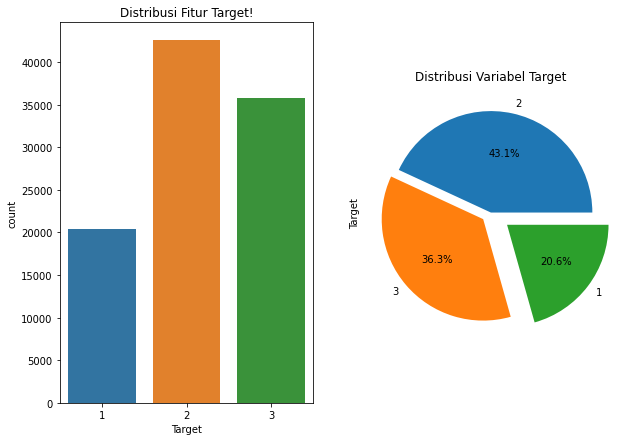

Persentase nilai pada fitur target

2    43.099171
3    36.278848
1    20.621981
Name: Target, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(1, 2, 1)
sns.countplot(df_train['Target'])
plt.title("Distribusi Fitur Target!")

plt.subplot(1,2,2)
count = df_train['Target'].value_counts()
count.plot.pie(autopct = '%1.1f%%', figsize = (10,7),explode = [0,0.1, 0.2],title = "pie chart persentase nilai pada fitur target")

plt.title('Distribusi Variabel Target')
plt.show()

print( "Persentase nilai pada fitur target\n")
print(df_train['Target'].value_counts()/len(df_train)*100)

Text(0, 0.5, 'Banyaknya pelanggan')

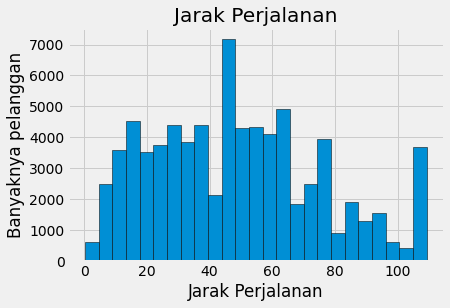

In [18]:
#Histogram fitur Umur
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi umur pelanggan
plt.hist(df_train['Jarak_Perjalanan'], edgecolor = 'k', bins = 25)
plt.title('Jarak Perjalanan'); plt.xlabel('Jarak Perjalanan'); plt.ylabel('Banyaknya pelanggan')

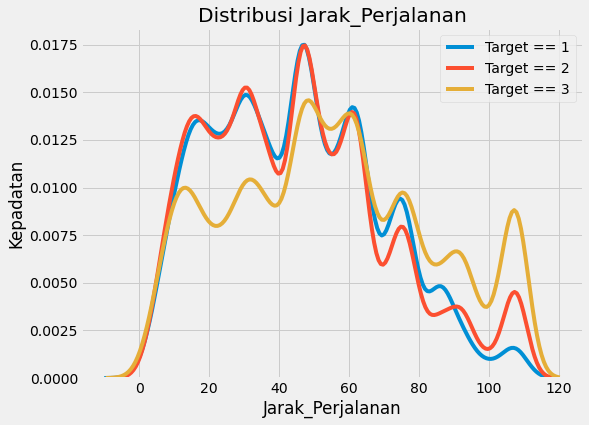

In [19]:
#Plot distribusi Jarak
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan umur pelanggan dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Jarak_Perjalanan'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Jarak_Perjalanan'], label = 'Target == 2')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Jarak_Perjalanan'], label = 'Target == 3')

# Labeling of plot
plt.xlabel('Jarak_Perjalanan'); plt.ylabel('Kepadatan'); plt.title('Distribusi Jarak_Perjalanan')

plt.legend()
plt.show()

Text(0, 0.5, 'Banyaknya pelanggan')

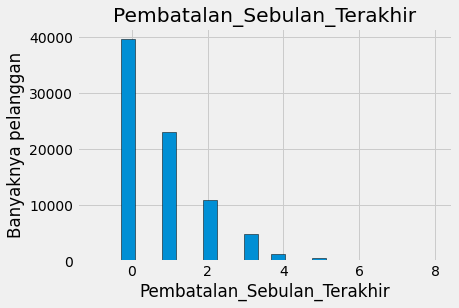

In [20]:
#Histogram fitur Umur
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi umur pelanggan
plt.hist(df_train['Pembatalan_Sebulan_Terakhir'], edgecolor = 'k', bins = 25)
plt.title('Pembatalan_Sebulan_Terakhir'); plt.xlabel('Pembatalan_Sebulan_Terakhir'); plt.ylabel('Banyaknya pelanggan')

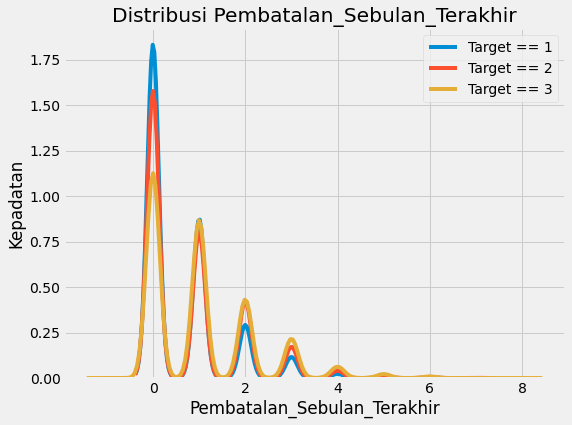

In [21]:
#Plot distribusi Pembatalan
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan umur pelanggan dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Pembatalan_Sebulan_Terakhir'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Pembatalan_Sebulan_Terakhir'], label = 'Target == 2')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Pembatalan_Sebulan_Terakhir'], label = 'Target == 3')

# Labeling of plot
plt.xlabel('Pembatalan_Sebulan_Terakhir'); plt.ylabel('Kepadatan'); plt.title('Distribusi Pembatalan_Sebulan_Terakhir')

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


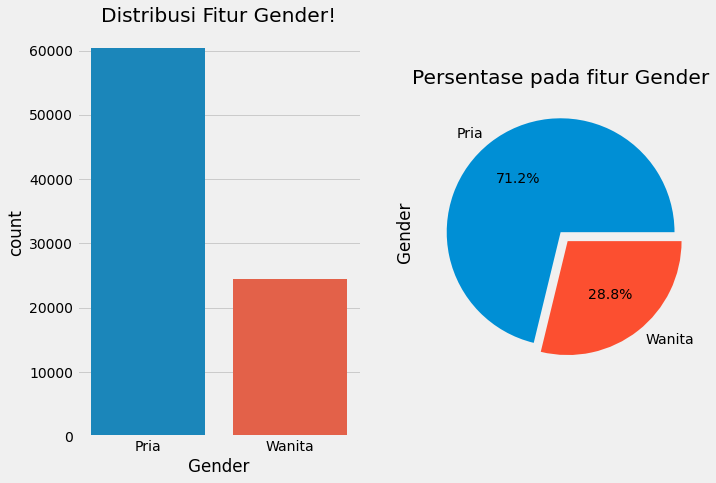

In [22]:
#Plot distribusi fitur Gender.
plt.subplot(1, 2, 1)
sns.countplot(df_train['Gender'])
plt.title("Distribusi Fitur Gender!")

plt.subplot(1,2,2)
count = df_train['Gender'].value_counts()
count.plot.pie(autopct = '%1.1f%%', figsize = (10,7),explode = [0,0.1],title = "Persentase nilai pada fitur Gender")

plt.title('Persentase pada fitur Gender')
plt.show()

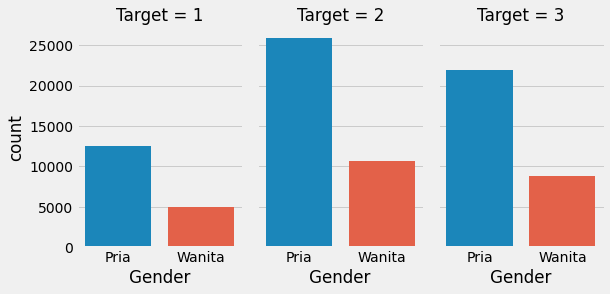

In [23]:
#Pengaruh fitur 'Gender' dengan variabel Target
g = sns.catplot(x="Gender", col="Target",
                data=df_train, kind="count",
                height=4, aspect=.7)


plt.show()

In [24]:
df_train['Tipe_Kendaraan'].value_counts()

B    19870
C    17831
A    13710
D    12110
E     7361
b     1720
c     1566
a     1160
d      992
e      636
Name: Tipe_Kendaraan, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


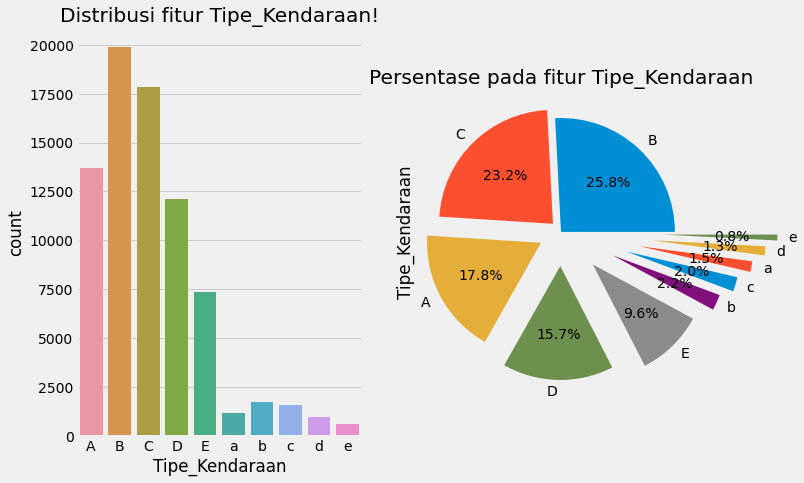

In [25]:
plt.subplot(1, 2, 1)
sns.countplot(df_train['Tipe_Kendaraan'])
plt.title("Distribusi fitur Tipe_Kendaraan!")

plt.subplot(1,2,2)
count = df_train['Tipe_Kendaraan'].value_counts()
count.plot.pie(autopct = '%1.1f%%', figsize = (10,7),explode = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],title = "pie chart persentase nilai pada fitur Izin Mengemudi")

plt.title('Persentase pada fitur Tipe_Kendaraan')
plt.show()


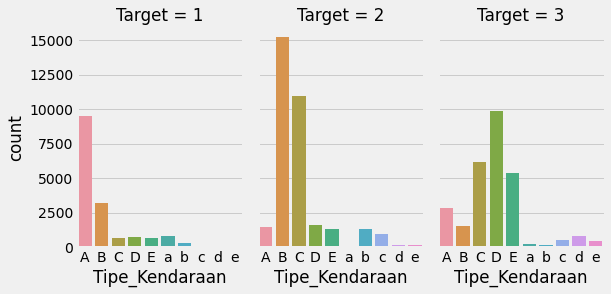

In [26]:
#Pengaruh fitur 'Izin_Mengemudi' dengan variabel Target
g = sns.catplot(x="Tipe_Kendaraan",col="Target",
                data=df_train, kind="count",
                height=4, aspect=.7)

plt.show()

In [27]:
df_train['Pelanggan_Sejak_Bulan'].value_counts()

 10.0    26865
 2.0      7292
 3.0      6583
 0.0      6405
 5.0      5375
 1.0      5155
 4.0      4899
 7.0      4725
 6.0      4669
 8.0      4004
 9.0      3219
-3.0        16
-2.0        12
-1.0        11
Name: Pelanggan_Sejak_Bulan, dtype: int64

Text(0, 0.5, 'Banyaknya pelanggan')

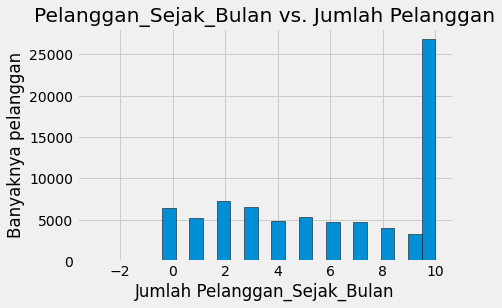

In [28]:
#Histogram fitur Biaya
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi umur pelanggan
plt.hist(df_train['Pelanggan_Sejak_Bulan'], edgecolor = 'k', bins = 25)
plt.title('Pelanggan_Sejak_Bulan vs. Jumlah Pelanggan'); plt.xlabel('Jumlah Pelanggan_Sejak_Bulan'); plt.ylabel('Banyaknya pelanggan')

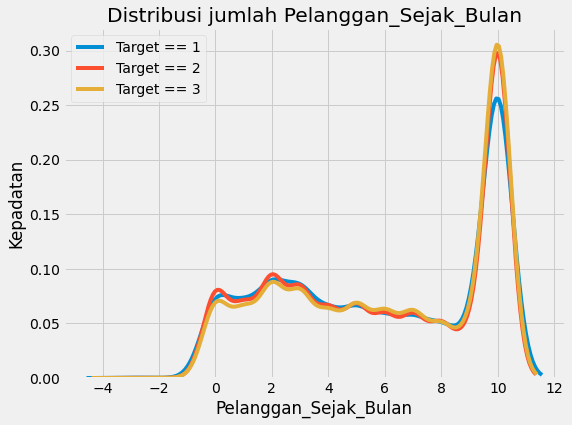

In [29]:
#Plot distribusi Biaya
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan Biaya pelanggan dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Pelanggan_Sejak_Bulan'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Pelanggan_Sejak_Bulan'], label = 'Target == 2')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Pelanggan_Sejak_Bulan'], label = 'Target == 3')

# Labeling of plot
plt.xlabel('Pelanggan_Sejak_Bulan'); plt.ylabel('Kepadatan'); plt.title('Distribusi jumlah Pelanggan_Sejak_Bulan')

plt.legend()
plt.show()

Text(0, 0.5, 'Banyaknya pelanggan')

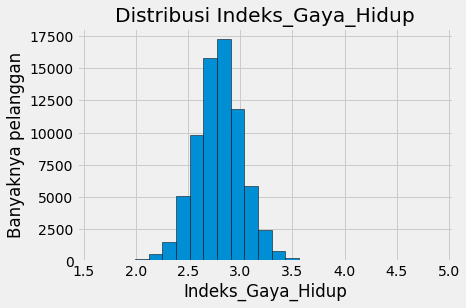

In [30]:
#Histogram fitur Kode Wilayah
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi umur pelanggan
plt.hist(df_train['Indeks_Gaya_Hidup'], edgecolor = 'k', bins = 25)
plt.title('Distribusi Indeks_Gaya_Hidup'); plt.xlabel('Indeks_Gaya_Hidup'); plt.ylabel('Banyaknya pelanggan')

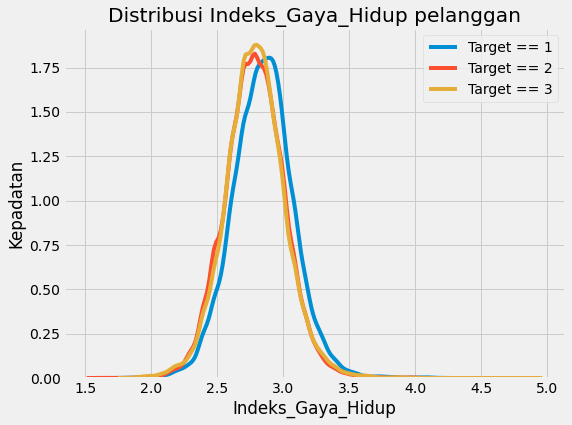

In [31]:
#Plot distribusi Kode Wilayah
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan Biaya pelanggan dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Indeks_Gaya_Hidup'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Indeks_Gaya_Hidup'], label = 'Target == 2')

# plot KDE untuk hubungan Biaya pelanggan dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Indeks_Gaya_Hidup'] , label = 'Target == 3')

# Labeling of plot
plt.xlabel('Indeks_Gaya_Hidup'); plt.ylabel('Kepadatan'); plt.title('Distribusi Indeks_Gaya_Hidup pelanggan')

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


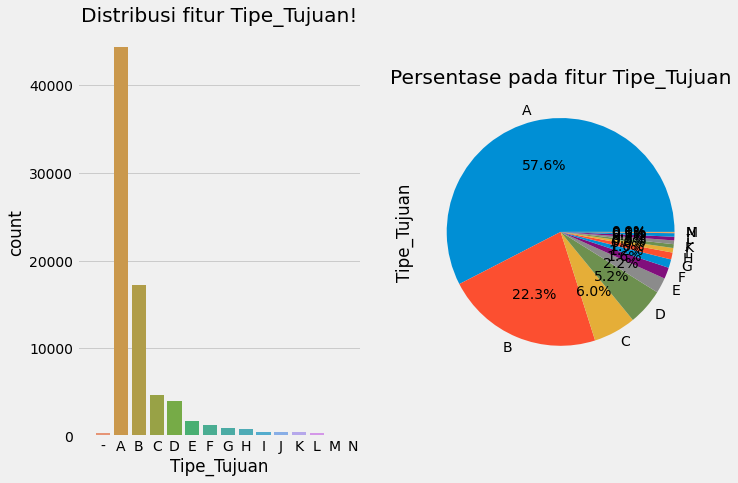

In [32]:
#Plot Tahun Kendaraan
plt.subplot(1, 2, 1)
sns.countplot(df_train['Tipe_Tujuan'])
plt.title("Distribusi fitur Tipe_Tujuan!")

plt.subplot(1,2,2)
count = df_train['Tipe_Tujuan'].value_counts()
count.plot.pie(autopct = '%1.1f%%', figsize = (10,7),title = "pie chart persentase nilai pada fitur Tipe_Tujuan")

plt.title('Persentase pada fitur Tipe_Tujuan')
plt.show()

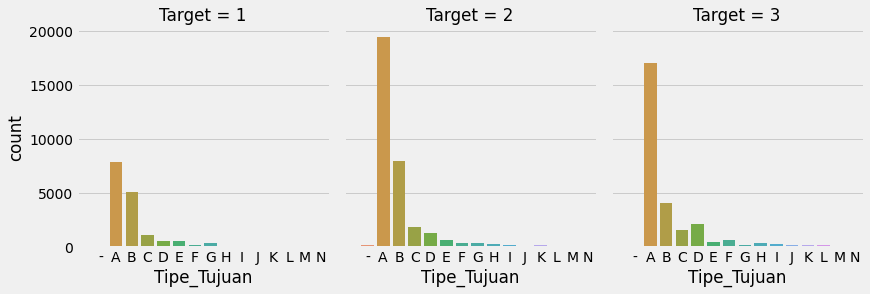

In [33]:
#Pengaruh fitur 'Tahun_Kendaraan' dengan variabel Target
g = sns.catplot(x="Tipe_Tujuan",col="Target",
                data=df_train, kind="count",
                height=4, ci = None)

Text(0, 0.5, 'Banyaknya pelanggan')

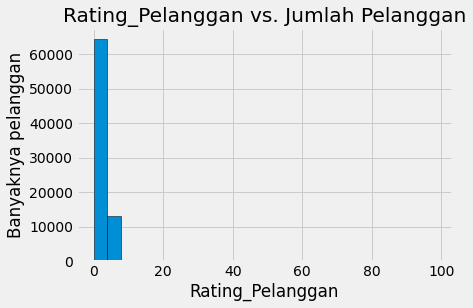

In [34]:
#Histogram fitur Rating Pelanggan
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi rating pelanggan
plt.hist(df_train['Rating_Pelanggan'], edgecolor = 'k', bins = 25)
plt.title('Rating_Pelanggan vs. Jumlah Pelanggan'); plt.xlabel('Rating_Pelanggan'); plt.ylabel('Banyaknya pelanggan')

In [35]:
df_train.Rating_Pelanggan.max()

98.2763

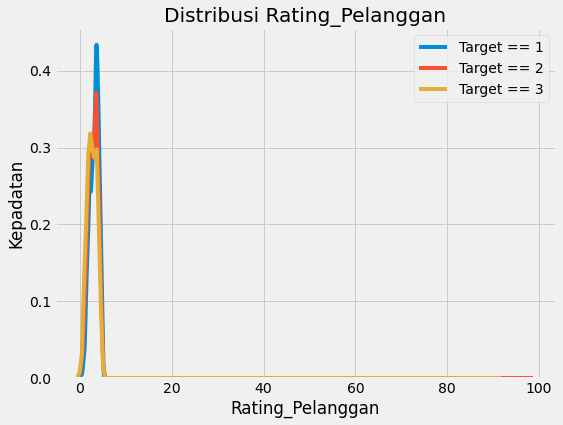

In [36]:
#Plot distribusi rating pelanggan
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan Biaya pelanggan dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Rating_Pelanggan'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Rating_Pelanggan'], label = 'Target == 2')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Rating_Pelanggan'], label = 'Target == 3')

# Labeling of plot
plt.xlabel('Rating_Pelanggan'); plt.ylabel('Kepadatan'); plt.title('Distribusi Rating_Pelanggan')

plt.legend()
plt.show()

Text(0, 0.5, 'Banyaknya pelanggan')

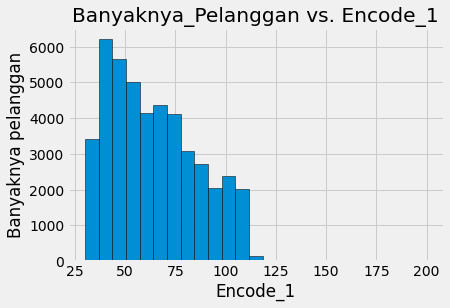

In [37]:
#Histogram fitur Encode_1
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi rating pelanggan
plt.hist(df_train['Encode_1'], edgecolor = 'k', bins = 25)
plt.title('Banyaknya_Pelanggan vs. Encode_1'); plt.xlabel('Encode_1'); plt.ylabel('Banyaknya pelanggan')

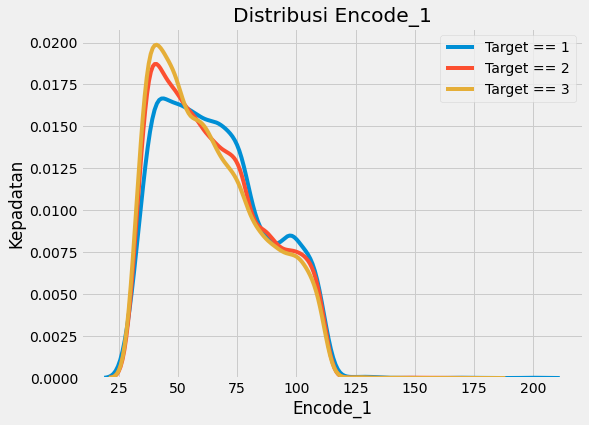

In [38]:
#Plot distribusi Encode_1
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan Encode_1 dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Encode_1'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Encode_1'], label = 'Target == 2')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Encode_1'], label = 'Target == 3')

# Labeling of plot
plt.xlabel('Encode_1'); plt.ylabel('Kepadatan'); plt.title('Distribusi Encode_1')

plt.legend()
plt.show()

Text(0, 0.5, 'Banyaknya pelanggan')

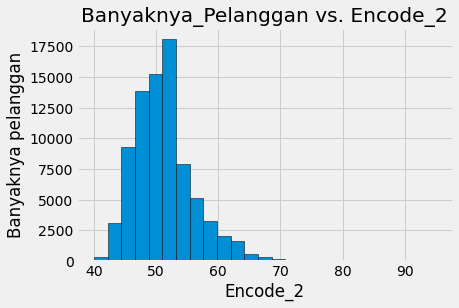

In [39]:
#Histogram fitur Encode_2
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi rating pelanggan
plt.hist(df_train['Encode_2'], edgecolor = 'k', bins = 25)
plt.title('Banyaknya_Pelanggan vs. Encode_2'); plt.xlabel('Encode_2'); plt.ylabel('Banyaknya pelanggan')

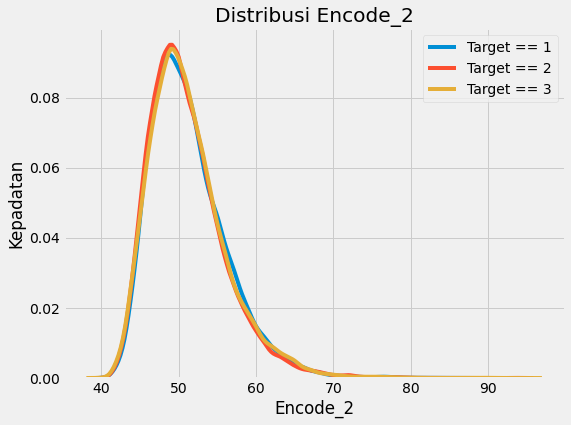

In [40]:
#Plot distribusi Encode_2
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan Encode_1 dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Encode_2'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Encode_2'], label = 'Target == 2')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Encode_2'], label = 'Target == 3')

# Labeling of plot
plt.xlabel('Encode_2'); plt.ylabel('Kepadatan'); plt.title('Distribusi Encode_2')

plt.legend()
plt.show()

Text(0, 0.5, 'Banyaknya pelanggan')

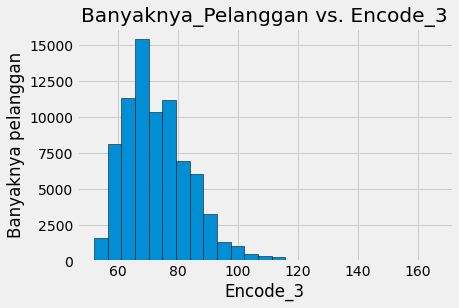

In [41]:
#Histogram fitur Encode_3
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot distribusi rating pelanggan
plt.hist(df_train['Encode_3'], edgecolor = 'k', bins = 25)
plt.title('Banyaknya_Pelanggan vs. Encode_3'); plt.xlabel('Encode_3'); plt.ylabel('Banyaknya pelanggan')

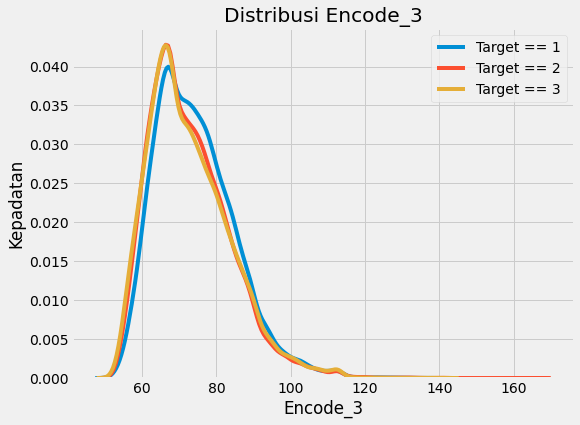

In [42]:
#Plot distribusi Encode_3
plt.figure(figsize = (8, 6))

# plot KDE untuk hubungan Encode_1 dengan variabel target
sns.kdeplot(df_train.loc[df_train['Target'] == 1, 'Encode_3'] , label = 'Target == 1')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 2, 'Encode_3'], label = 'Target == 2')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['Target'] == 3, 'Encode_3'], label = 'Target == 3')

# Labeling of plot
plt.xlabel('Encode_3'); plt.ylabel('Kepadatan'); plt.title('Distribusi Encode_3')

plt.legend()
plt.show()

## Isi Missing values!

In [43]:
df_train.groupby(['Target'])['Tipe_Kendaraan'].agg(pd.Series.mode)[0]

'A'

In [44]:
#Imputasi modus pada variabel-variabel tipe data object! (Training data)
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
# tipe_kendaraan = df_train.groupby(['Target'])['Tipe_Kendaraan'].mode()
df_train['Tipe_Kendaraan']=df_train['Tipe_Kendaraan'].fillna(pd.Series(np.where(df_train['Target'] ==1, "A", np.where(df_train['Target']==2, "B","D"))))
df_train["Tipe_Tujuan"].replace("-",np.nan)
df_train['Tipe_Tujuan'].fillna(df_train['Tipe_Tujuan'].mode()[0], inplace=True)


#Imputasi modus pada variabel-variabel tipe data object! (Testing data)
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
# tipe_kendaraan = df_train.groupby(['Target'])['Tipe_Kendaraan'].mode()
df_test['Tipe_Kendaraan']=df_test['Tipe_Kendaraan'].fillna(pd.Series(np.where(df_train['Target'] ==1, "A", np.where(df_train['Target']==2, "B","D"))))
df_test["Tipe_Tujuan"].replace("-",np.nan)
df_test['Tipe_Tujuan'].fillna(df_train['Tipe_Tujuan'].mode()[0], inplace=True)

#### Imputasi Tipe Data Numerik

In [45]:
df_train['Jarak_Perjalanan'].fillna(df_train['Jarak_Perjalanan'].mean(), inplace=True)
df_test['Jarak_Perjalanan'].fillna(df_train['Jarak_Perjalanan'].mean(), inplace=True)

df_train['Pelanggan_Sejak_Bulan'].fillna(df_train['Pelanggan_Sejak_Bulan'].mode()[0], inplace=True)
df_test['Pelanggan_Sejak_Bulan'].fillna(df_train['Pelanggan_Sejak_Bulan'].mode()[0], inplace=True)

df_train['Indeks_Gaya_Hidup'].fillna(np.int(df_train['Indeks_Gaya_Hidup'].mean()), inplace=True)
df_test['Indeks_Gaya_Hidup'].fillna(np.int(df_train['Indeks_Gaya_Hidup'].mean()), inplace=True)

df_train['Rating_Pelanggan']=df_train['Rating_Pelanggan'].apply(lambda x: 5 if x>=5 else x)
df_test['Rating_Pelanggan']=df_test['Rating_Pelanggan'].apply(lambda x: 5 if x>=5 else x)
df_train['Rating_Pelanggan'].fillna(df_train['Rating_Pelanggan'].median(), inplace=True)
df_test['Rating_Pelanggan'].fillna(df_train['Rating_Pelanggan'].median(), inplace=True)

df_train['Pembatalan_Sebulan_Terakhir'].fillna(df_train['Pembatalan_Sebulan_Terakhir'].median(), inplace=True)
df_test['Pembatalan_Sebulan_Terakhir'].fillna(df_train['Pembatalan_Sebulan_Terakhir'].median(), inplace=True)

df_train['Encode_1'].fillna(df_train['Encode_1'].mean(), inplace=True)
df_test['Encode_1'].fillna(df_train['Encode_1'].mean(), inplace=True)

df_train['Encode_2'].fillna(df_train['Encode_2'].mean(), inplace=True)
df_test['Encode_2'].fillna(df_train['Encode_2'].mean(), inplace=True)

df_train['Encode_3'].fillna(df_train['Encode_3'].mean(), inplace=True)
df_test['Encode_3'].fillna(df_train['Encode_3'].mean(), inplace=True)

## Heatmap Korelasi!

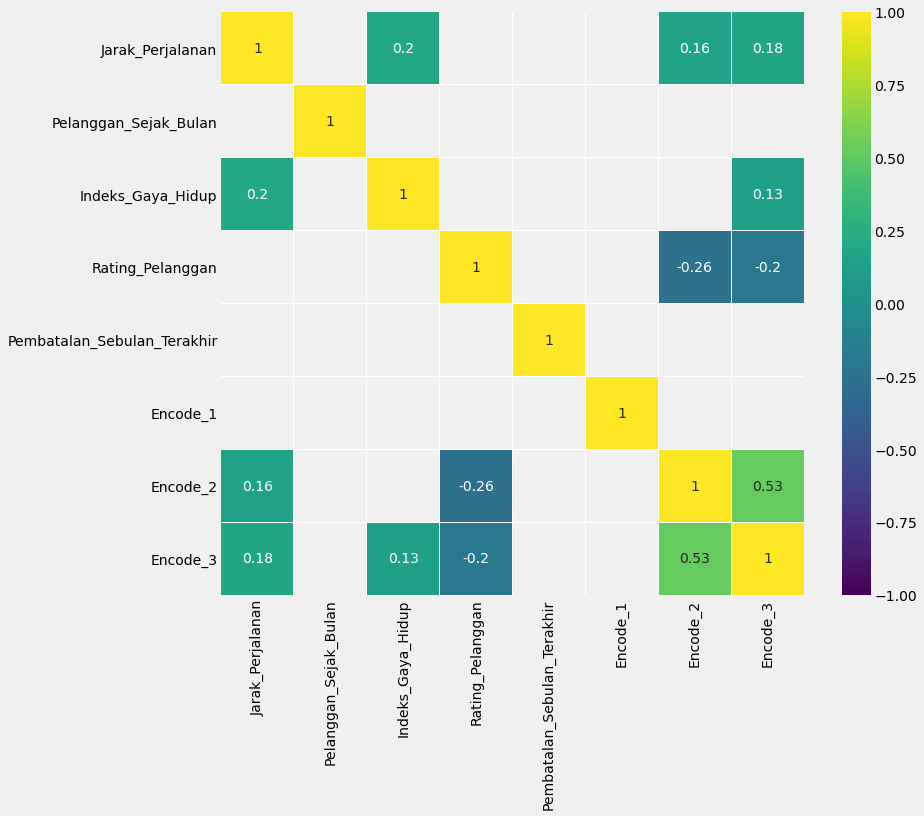

In [46]:
#Visualisasi nilai-nilai korelasi!
corr = df_train.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True)

In [47]:
df_train['Encode_23'] = df_train['Encode_2']*df_train['Encode_3']

## Modelling!

In [48]:
df_train_target = df_train.Target

df_train.drop('Target', axis = 1, inplace=True)

In [49]:
test_id = df_test['ID']
df_train.drop(['ID'], axis=1, inplace=True)
df_test.drop(['ID'], axis=1, inplace=True)

In [50]:
df_train2 = pd.get_dummies(df_train)
df_test2 = pd.get_dummies(df_test)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train2[['Encode_1', 'Encode_2', 'Encode_3',"Jarak_Perjalanan"]])

scaler.transform(df_train2[['Encode_1', 'Encode_2', 'Encode_3',"Jarak_Perjalanan"]])
scaler.transform(df_test2[['Encode_1', 'Encode_2', 'Encode_3',"Jarak_Perjalanan"]])

array([[-1.74202069e-12, -7.01553863e-01, -1.04515069e+00,
        -1.18800886e+00],
       [-1.74202069e-12,  4.15964470e-01,  1.99809045e-01,
         5.50359478e-01],
       [ 2.09070253e+00,  2.02481356e-12, -1.14889733e+00,
         3.99453594e-01],
       ...,
       [-9.56961205e-01,  2.65100114e+00,  1.67041418e-12,
        -1.61332740e+00],
       [ 7.36185317e-01, -4.78050196e-01, -5.26417466e-01,
         1.62634688e-13],
       [-2.04057498e+00,  1.92460803e-01, -2.15177533e-01,
        -2.81308984e-01]])

In [52]:
#Equalizing the number of features in our training and testing data using inner join method!
df_train2, df_test2 = df_train2.align(df_test2, join = 'inner', axis = 1)

In [53]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train2, df_train_target, test_size=0.2, random_state=42, shuffle=True)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(max_iter=1000, multi_class="multinomial", solver="sag")
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# accuracy_score(y_test, y_pred)

In [56]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="gini", max_depth=8)
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7775189873417722

In [57]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(max_depth=22, warm_start=True)
r_forest.fit(X_train,y_train)

y_pred = r_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.7806582278481012

In [58]:
# from sklearn.ensemble import GradientBoostingClassifier
# gboost=GradientBoostingClassifier(learning_rate=0.2)
# gboost.fit(X_train, y_train)

# y_pred = gboost.predict(X_test)
# accuracy_score(y_test, y_pred)

In [59]:
predict=r_forest.predict(df_test2)

In [60]:
df_test2.head()

,Jarak_Perjalanan,Pelanggan_Sejak_Bulan,Indeks_Gaya_Hidup,Rating_Pelanggan,Pembatalan_Sebulan_Terakhir,Encode_1,Encode_2,Encode_3,Tipe_Kendaraan_A,Tipe_Kendaraan_B,Tipe_Kendaraan_C,Tipe_Kendaraan_D,Tipe_Kendaraan_E,Tipe_Kendaraan_a,Tipe_Kendaraan_b,Tipe_Kendaraan_c,Tipe_Kendaraan_d,Tipe_Kendaraan_e,Tipe_Tujuan_,Tipe_Tujuan_-,Tipe_Tujuan_A,Tipe_Tujuan_B,Tipe_Tujuan_C,Tipe_Tujuan_D,Tipe_Tujuan_E,Tipe_Tujuan_F,Tipe_Tujuan_G,Tipe_Tujuan_H,Tipe_Tujuan_I,Tipe_Tujuan_J,Tipe_Tujuan_K,Tipe_Tujuan_L,Tipe_Tujuan_M,Tipe_Tujuan_N,Gender_Pria,Gender_Wanita
0,20.580000,1.0,2.66087,4.17500,1.0,64.129923,48.000000,63.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,61.820000,1.0,2.77769,2.91750,1.0,64.129923,53.000000,75.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,58.240000,10.0,2.00000,4.06625,1.0,95.000000,51.138892,62.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,32.260000,4.0,2.69283,4.06625,1.0,44.000000,53.000000,74.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,48.763604,10.0,2.92629,3.79125,1.0,69.000000,54.000000,79.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
submission = pd.DataFrame({'id':test_id,'Target':predict})

#Visualize the first 5 rows
submission.head()

,id,Target
0,J005691205,2
1,J005904963,2
2,J005890232,2
3,J005727215,2
4,J005787309,1


In [62]:
# Save the submission dataframe
submission.to_csv('/content/gdrive/My Drive/Dataset for Data Science Project/Joints 2021/submitfinal3.csv', index = False)